# Report: Correlation between Human Development Index and Crime Rates in the World

## Contents :

    Introduction 
    Methods
    Installation of dependencies
    Loading Data
    Prepare Data
    Results
    Discussion/Conclusions:



## Introduction:

The United Nations provides several datasets that are used in studies conducted to analyze the current situation of the world and identify trends. This helps in understanding where the world is headed.

In this study, we are questioning whether there is a correlation between the Human Development Index (HDI) and crime rates (in two types of categories: Offenses or Environmental Crimes) at the country level.

The United Nations assigns each country a score from 0 to 1, depending on several factors such as the duration of education for each citizen and economic parameters. In addition, the United Nations also collects crime rates for each country, providing publicly accessible data in several categories. During this work, we aim to compare different crime scores with various factors of the development index to see if there is any significant relationship that warrants further investigation.




# Datasources:
### Datasource1: Human Development Report 

*Metadata URL:
 *https://hdr.undp.org/content/human-development-report-2021-22

*Data URL:
 *https://github.com/Derin6/MADE_Project/blob/77927c42c204107353521835a03242dcc45f1f66/project/efotw-2023-master-index-data-for-researchers-iso.xlsx](https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Statistical_Annex_HDI_Table.xlsx
 
*Data Format: xlsx

The dataset includes the entire Human Development Index dataset, including sub-indicators from 2021 for every country included in the research. Data features are listed below: "Human Development Index (HDI), Life expectancy at birth, Expected years of schooling, Mean years of schooling, Gross national income (GNI) per capita, GNI per capita rank minus HDI rank, HDI rank."

### Datasource2: Corruption & Economic Crime

*Metadata URL:
 *https://dataunodc.un.org/dp-crime-corruption-offences
 
*Data URL:
 *https://dataunodc.un.org/sites/dataunodc.un.org/files/data_cts_corruption_and_economic_crime.xlsx
 
*Data Format: xlsx

The dataset includes crime rates in each country for several sub-categories from 2003 to 2021, with two measurement options: Counts or rate per 100,000 population. Data features are listed below: "Iso3_code, Country, Region, Subregion, Indicator, Dimension, Category, Sex, Age, Year, Unit of measurement, VALUE, Source."


# Methods:


##  Data cleaning / Transformation :


To avoid HTTP and SSL errors during data collection from the United Nations websites, a CustomHttpAdapter class and extract function compatible with both Windows and Linux were added. Then, pandas' read_excel function is used to obtain data with the openpyxl engine, a useful tool for reading xlsx files.

During the data cleaning step, firstly, desired data features are determined. Analytical features and country names from both datasets are selected and kept, while the rest of the data columns are dropped. For Dataframe 1, which includes Corruption & Economic Crime, the selected columns are "Country, Indicator, Unit of measurement, Sex, Year, VALUE"; For Dataframe 2, which includes the Human Development Index, the selected columns are "Country, Year, Human Development Index (HDI), Life expectancy at birth, Expected years of schooling, Mean years of schooling, Gross national income (GNI) per capita."

Secondly, column names are corrected. Data from both datasets are cleaned to only include 2021 data, as it is the only intersection year for both studies. Dataframe 1 is filtered to keep data for rows that include 'Rate per 100,000 population' as a unit and total sex data. Then, both data frames are merged into a single frame based on intersected values in the "intersection column."

At the next step, rows with the same values for Indicator and Country are aggregated to consolidate the crime data categories. Each country does not have or provide the same categories for detailed subcategories of crime information. This decision helps to conduct a broader analysis with a greater selection of countries.

Finally, this DataFrame is divided into two, where one keeps the Offenses crime data, and the other keeps Acts against the environment. In the end, the dataframe is loaded into Made_Project.sqlite. During this step, each column's datatype is specified as a "blob," allowing the original data format of each column of the dataframe to be preserved in the SQL file too.




 



# Installation of dependencies and Loading Modules:


In [182]:
%pip install --upgrade pip
%pip install pandas
%pip install requests
%pip install sqlalchemy
%pip install example
%pip install openpyxl
%pip install --upgrade pandas openpyxl
%pip install urllib3
%pip install matplotlib
%pip install numpy
%pip install scipy

import pandas as pd
import sqlite3
import urllib.request
from pandas.testing import assert_frame_equal
import example
import requests
from sqlalchemy import create_engine
from io import BytesIO
import ssl
import urllib3
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import pearsonr






Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated pac

# Loading Data:


In [176]:
conn = sqlite3.connect('Made_Project.sqlite')

query_1 = "SELECT * FROM table_1"
query_2 = "SELECT * FROM table_2"

dataframe_env_crime = pd.read_sql_query(query_1, conn)
dataframe_off_crime = pd.read_sql_query(query_2, conn)

conn.close()


In [177]:
dataframe_env_crime.head()

,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,Indicator,VALUE
0,Norway,0.961,83.2339,18.185200,13.003630,64660.10622,Acts against the environment,36.201969
1,Denmark,0.948,81.3753,18.714800,12.960490,60364.78595,Acts against the environment,84.981135
2,Sweden,0.947,82.9833,19.418530,12.609720,54489.37401,Acts against the environment,24.581792
3,Germany,0.942,80.6301,17.010139,14.090967,54534.21682,Acts against the environment,13.869081
4,Netherlands,0.941,81.6873,18.693165,12.581630,55979.41100,Acts against the environment,4.999516


In [178]:
dataframe_off_crime.head()

,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,Indicator,VALUE
0,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454,Offences,30.996134
1,Norway,0.961,83.2339,18.185200,13.00363,64660.10622,Offences,1.221539
2,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981,Offences,0.810077
3,Denmark,0.948,81.3753,18.714800,12.96049,60364.78595,Offences,175.667535
4,Sweden,0.947,82.9833,19.418530,12.60972,54489.37401,Offences,408.040548


# Prepare Data:

*In Data preparation step, outlier detection is performed to be able to have a healthier analysis. To be able to do the this each feature is assumed that they are normally distributed since this is the least informative selection therefore it would assume to be cause less loss to the datasets. Threshold for the z-value is selected as 3.

In [175]:
x=np.array([1,2,3,4,5,7])
for i in range(len(x)):
    dataframe_env_crime=dataframe_env_crime[np.abs(stats.zscore(dataframe_env_crime.iloc[:,x[i]])) < 3]
    dataframe_off_crime=dataframe_off_crime[np.abs(stats.zscore(dataframe_off_crime.iloc[:,x[i]])) < 3]


# Results:

*To be able to both visiually and analytically inspection of the datasets, Scratter plotting method and pearson correlation test is applied both of the datasets and results are reviewed.

According to both Scatter plots and the pearson correlation tests both Enironmental crimes and Offences are weakly correlated with Human Development Index (HDI) and neiter of the features that developed Human Development Index (HDI) has a greater correlation result than itself nor acceptable p-value that indicates a more trustable results than Human Development Index (HDI).

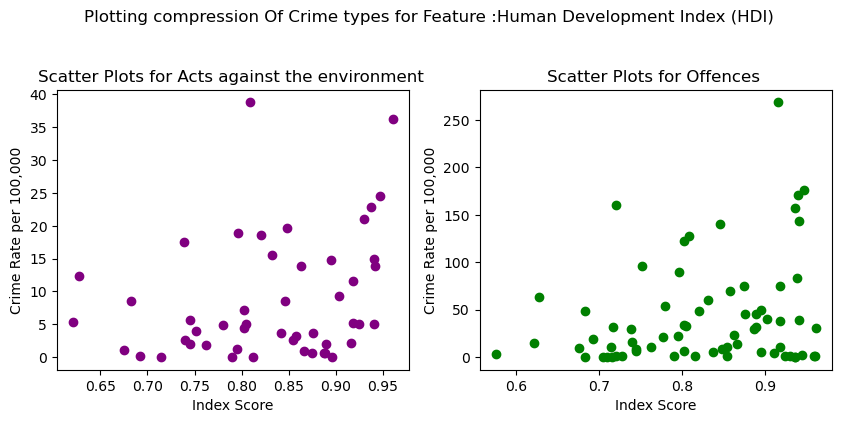

In [174]:
fig = plt.figure(figsize=(10, 8))


ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.scatter(dataframe_env_crime.iloc[:,1], dataframe_env_crime.iloc[:,-1],color="Purple")
ax1.set_xlabel("Index Score")
ax1.set_ylabel('Crime Rate per 100,000')
plt.title("Scatter Plots for Acts against the environment ")


ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.scatter(dataframe_off_crime.iloc[:,1], dataframe_off_crime.iloc[:,-1],color="Green")
ax2.set_xlabel("Index Score")
ax2.set_ylabel('Crime Rate per 100,000')
plt.title("Scatter Plots for Offences ")

plt.suptitle("Plotting compression Of Crime types for Feature :"+dataframe_env_crime.columns[1])
plt.show()





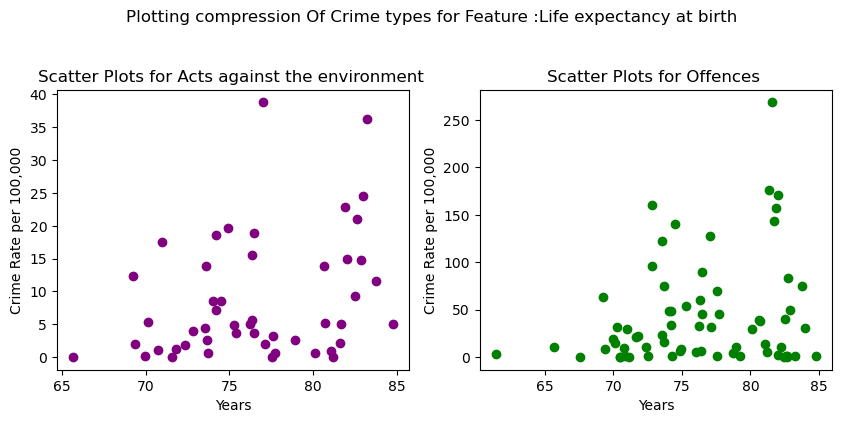

In [168]:
fig = plt.figure(figsize=(10, 8))


ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.scatter(dataframe_env_crime.iloc[:,2], dataframe_env_crime.iloc[:,-1],color="Purple")
ax1.set_xlabel("Years")
ax1.set_ylabel('Crime Rate per 100,000')
plt.title("Scatter Plots for Acts against the environment ")


ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.scatter(dataframe_off_crime.iloc[:,2], dataframe_off_crime.iloc[:,-1],color="Green")
ax2.set_xlabel("Years")
ax2.set_ylabel('Crime Rate per 100,000')
plt.title("Scatter Plots for Offences ")

plt.suptitle("Plotting compression Of Crime types for Feature :"+dataframe_env_crime.columns[2])
plt.show()

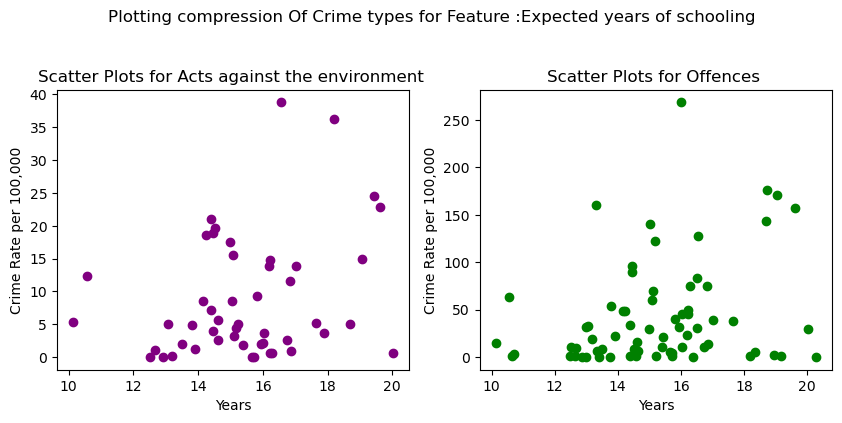

In [169]:
fig = plt.figure(figsize=(10, 8))


ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.scatter(dataframe_env_crime.iloc[:,3], dataframe_env_crime.iloc[:,-1],color="Purple")
ax1.set_xlabel("Years")
ax1.set_ylabel('Crime Rate per 100,000')
plt.title("Scatter Plots for Acts against the environment ")


ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.scatter(dataframe_off_crime.iloc[:,3], dataframe_off_crime.iloc[:,-1],color="Green")
ax2.set_xlabel("Years")
ax2.set_ylabel('Crime Rate per 100,000')
plt.title("Scatter Plots for Offences ")

plt.suptitle("Plotting compression Of Crime types for Feature :"+dataframe_env_crime.columns[3])
plt.show()

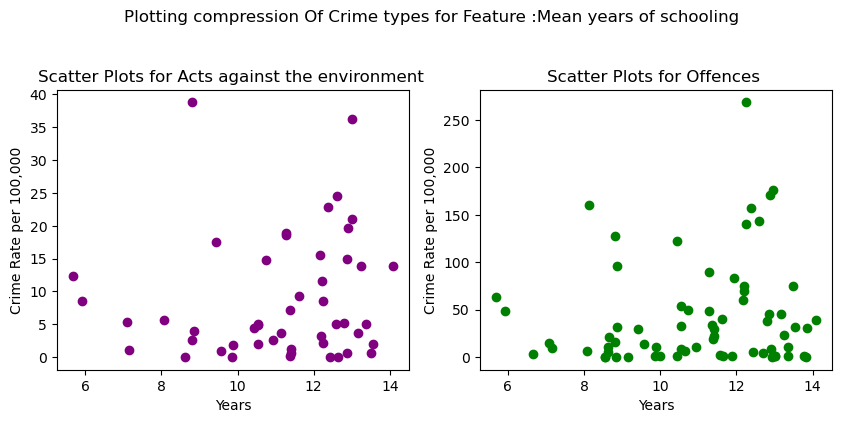

In [170]:
fig = plt.figure(figsize=(10, 8))


ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.scatter(dataframe_env_crime.iloc[:,4], dataframe_env_crime.iloc[:,-1],color="Purple")
ax1.set_xlabel("Years")
ax1.set_ylabel('Crime Rate per 100,000')
plt.title("Scatter Plots for Acts against the environment ")


ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.scatter(dataframe_off_crime.iloc[:,4], dataframe_off_crime.iloc[:,-1],color="Green")
ax2.set_xlabel("Years")
ax2.set_ylabel('Crime Rate per 100,000')
plt.title("Scatter Plots for Offences ")

plt.suptitle("Plotting compression Of Crime types for Feature :"+dataframe_env_crime.columns[4])
plt.show()

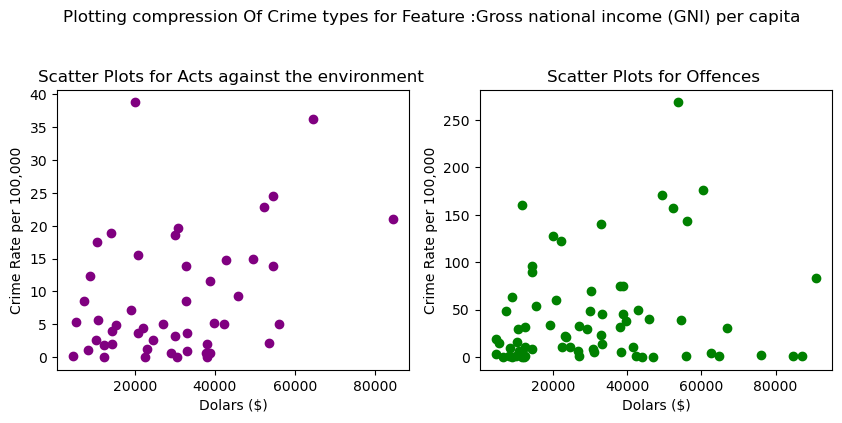

In [171]:
fig = plt.figure(figsize=(10, 8))


ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.scatter(dataframe_env_crime.iloc[:,5], dataframe_env_crime.iloc[:,-1],color="Purple")
ax1.set_xlabel("Dolars ($)")
ax1.set_ylabel('Crime Rate per 100,000')
plt.title("Scatter Plots for Acts against the environment ")


ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.scatter(dataframe_off_crime.iloc[:,5], dataframe_off_crime.iloc[:,-1],color="Green")
ax2.set_xlabel("Dolars ($)")
ax2.set_ylabel('Crime Rate per 100,000')
plt.title("Scatter Plots for Offences ")

plt.suptitle("Plotting compression Of Crime types for Feature :"+dataframe_env_crime.columns[5])
plt.show()



In [180]:
print("Correlation Tests\n\n")
for i in range(5):
    print("Pearson correlation in Acts against the environment for feature  "+dataframe_env_crime.columns[i+1]+" is:") , print(pearsonr(dataframe_env_crime.iloc[:,i+1], dataframe_env_crime.iloc[:,-1]),end="\n\n")
print("-----------------------------------------------------------------------------------------------------\n\n")
for i in range(5):
   
    print("Pearson correlation in Offences for feature "+dataframe_off_crime.columns[i+1]+" is:") , print(pearsonr(dataframe_off_crime.iloc[:,i+1], dataframe_off_crime.iloc[:,-1]),end="\n\n")

    
    
    


Correlation Tests


Pearson correlation in Acts against the environment for feature  Human Development Index (HDI)  is:
PearsonRResult(statistic=0.22325353905224182, pvalue=0.11162722158463288)

Pearson correlation in Acts against the environment for feature  Life expectancy at birth is:
PearsonRResult(statistic=0.17509355294145243, pvalue=0.21440554391789135)

Pearson correlation in Acts against the environment for feature  Expected years of schooling is:
PearsonRResult(statistic=0.2862690048924584, pvalue=0.03964678352548001)

Pearson correlation in Acts against the environment for feature  Mean years of schooling is:
PearsonRResult(statistic=0.10715695034657081, pvalue=0.4495792146278803)

Pearson correlation in Acts against the environment for feature  Gross national income (GNI) per capita is:
PearsonRResult(statistic=0.20104353492277416, pvalue=0.15296335289524418)

-----------------------------------------------------------------------------------------------------


Pearson cor

# Discussion/Conclusions:
From the results of this study, we can infer that the correlation between the Human Development Index (HDI) and Crime Rates, encompassing both Environmental Crimes and Offenses, appears to be weak. However, a notable concern arises regarding the accessibility and completeness of crime data in certain regions of the world, particularly those with lower HDI scores. This issue is evident in the United Nations dataset, where some columns corresponding to the subcategories of both types of crimes are empty for these countries.

This gap in data raises questions about the overall representation and reliability of crime statistics in lower HDI regions. The absence of comprehensive data in these areas suggests that the findings of this study might not fully encapsulate the global landscape of crime in relation to human development.

Additionally, the methodology employed to track crime rates could significantly influence the outcomes. The current approach, heavily reliant on the United Nations dataset, might benefit from supplementary methods. Alternative strategies, such as organizing questionnaires or monitoring local newspapers, could potentially yield a more extensive and varied collection of crime records. These methods might uncover data that is not captured in official records, offering a more nuanced understanding of the crime dynamics in different regions.

In conclusion, while the study reveals a weak correlation between HDI and Crime Rates, it also highlights the limitations of the existing data, especially in low HDI regions. To obtain a more accurate and comprehensive picture, future research should consider integrating diverse data sources and methodologies. Such an approach would not only enhance the understanding of the relationship between human development and crime but also contribute to more effective policy-making and interventions in these critical areas.